In [1]:
import sys
sys.path.append('/home/max/sedpy')
from sedpy import attenuation
import fsps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=0, zmet=2, dust_type=2, dust2=0.2, sf_start=6.)

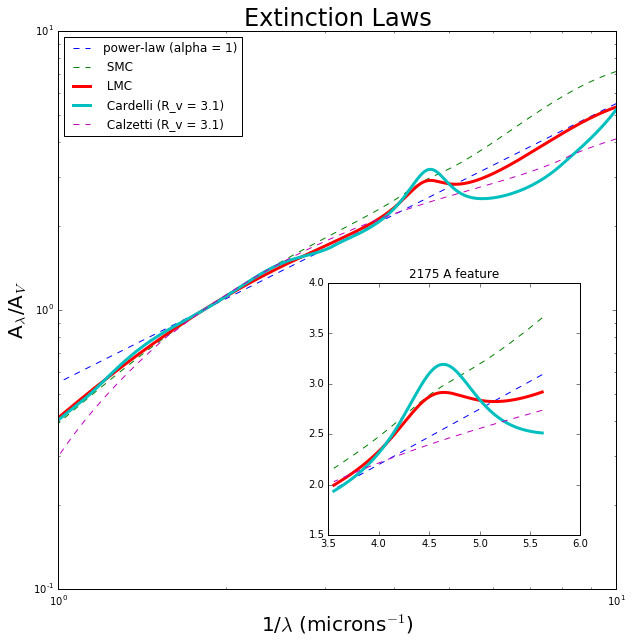

In [3]:
fig = plt.figure(figsize = (10,10))

waves = np.logspace(3,4,1000)
caldust = attenuation.calzetti(waves, R_v = 3.1)
powdust = attenuation.powerlaw(waves)
cardust = attenuation.cardelli(waves)
smcdust = attenuation.smc(waves)
lmcdust = attenuation.lmc(waves)
plt.loglog(1/(waves/1e4), powdust, '--')
plt.loglog(1/(waves/1e4), smcdust, '--')
plt.loglog(1/(waves/1e4), lmcdust, linewidth = 3)
plt.loglog(1/(waves/1e4), cardust, linewidth = 3)
plt.loglog(1/(waves/1e4), caldust, '--')
plt.legend(['power-law (alpha = 1)', ' SMC' , ' LMC' , ' Cardelli (R_v = 3.1)' , ' Calzetti (R_v = 3.1)' ], loc = 2)
plt.title('Extinction Laws', fontsize = 24)
plt.xlabel('1/$\lambda$ (microns$^{-1}$)', fontsize = 20)
plt.ylabel('A$_\lambda$/A$_V$ ', fontsize = 20)

a = plt.axes([.5, .2, .35, .35])
plt.plot(1/(waves[250:450]/1e4), powdust[250:450], '--b')
plt.plot(1/(waves[250:450]/1e4), smcdust[250:450], '--g')
plt.plot(1/(waves[250:450]/1e4), lmcdust[250:450], 'r', linewidth = 3)
plt.plot(1/(waves[250:450]/1e4), cardust[250:450], 'c', linewidth = 3)
plt.plot(1/(waves[250:450]/1e4), caldust[250:450], '--m')
plt.title('2175 A feature')

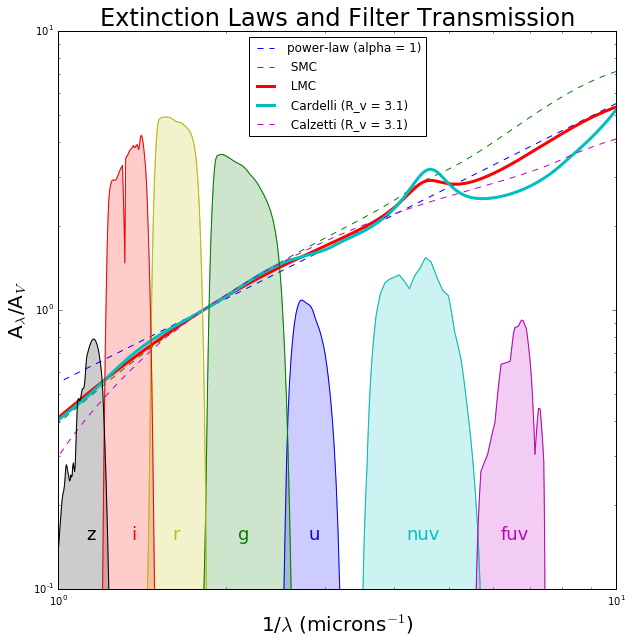

In [24]:
u = fsps.get_filter('sdss_u')
utrans = u.transmission

g = fsps.get_filter('sdss_g')
gtrans = g.transmission

r = fsps.get_filter('sdss_r')
rtrans = r.transmission

i = fsps.get_filter('sdss_i')
itrans = i.transmission

z = fsps.get_filter('sdss_z')
ztrans = z.transmission

nuv = fsps.get_filter('galex_nuv')
nuvtrans = nuv.transmission

fuv = fsps.get_filter('galex_fuv')
fuvtrans = fuv.transmission

fig = plt.figure(figsize = (10,10))
waves = np.logspace(3,4,1000)
caldust = attenuation.calzetti(waves, R_v = 3.1)
powdust = attenuation.powerlaw(waves)
cardust = attenuation.cardelli(waves)
smcdust = attenuation.smc(waves)
lmcdust = attenuation.lmc(waves)
plt.loglog(1/(waves/1e4), powdust, '--')
plt.loglog(1/(waves/1e4), smcdust, '--')
plt.loglog(1/(waves/1e4), lmcdust, linewidth = 3)
plt.loglog(1/(waves/1e4), cardust, linewidth = 3)
plt.loglog(1/(waves/1e4), caldust, '--')
plt.legend(['power-law (alpha = 1)', ' SMC' , ' LMC' , ' Cardelli (R_v = 3.1)' , ' Calzetti (R_v = 3.1)' ], loc = 'best')
plt.loglog(1/(utrans[0]/1e4), utrans[1]/.1, 'b')
plt.fill_between(1/(utrans[0]/1e4), .01, utrans[1]/.1, facecolor='b', alpha = .2)
plt.loglog(1/(gtrans[0]/1e4), gtrans[1]/.1, 'g')
plt.fill_between(1/(gtrans[0]/1e4), .01, gtrans[1]/.1, facecolor='g', alpha = .2)
plt.loglog(1/(rtrans[0]/1e4), rtrans[1]/.1, 'y')
plt.fill_between(1/(rtrans[0]/1e4), .01, rtrans[1]/.1, facecolor='y', alpha = .2)
plt.loglog(1/(itrans[0]/1e4), itrans[1]/.1, 'r')
plt.fill_between(1/(itrans[0]/1e4), .01, itrans[1]/.1, facecolor='r', alpha = .2)
plt.loglog(1/(ztrans[0]/1e4), ztrans[1]/.1, 'k')
plt.fill_between(1/(ztrans[0]/1e4), .01, ztrans[1]/.1, facecolor='k', alpha = .2)
plt.loglog(1/(nuvtrans[0]/1e4), nuvtrans[1]/40, 'c')
plt.fill_between(1/(nuvtrans[0]/1e4), .01, nuvtrans[1]/40, facecolor='c', alpha = .2)
plt.loglog(1/(fuvtrans[0]/1e4), fuvtrans[1]/40, 'm')
plt.fill_between(1/(fuvtrans[0]/1e4), .01, fuvtrans[1]/40, facecolor='m', alpha = .2)
plt.ylim([.1,10.])
plt.xlim([1.,10.])
plt.text(1.12,.15,'z', color = 'k', fontsize = 18)
plt.text(1.35,.15,'i', color = 'r', fontsize = 18)
plt.text(1.6,.15,'r', color = 'y', fontsize = 18)
plt.text(2.1,.15,'g', color = 'g', fontsize = 18)
plt.text(2.8,.15,'u', color = 'b', fontsize = 18)
plt.text(4.2,.15,'nuv', color = 'c', fontsize = 18)
plt.text(6.2,.15,'fuv', color = 'm', fontsize = 18)
plt.title('Extinction Laws and Filter Transmission', fontsize = 24)
plt.xlabel('1/$\lambda$ (microns$^{-1}$)', fontsize = 20)
plt.ylabel('A$_\lambda$/A$_V$ ', fontsize = 20)


In [25]:
# getting the normalization constants between the two different types of filters

print(np.trapz(fuvtrans[1], (1/(fuvtrans[0]/1e4))))

print(np.trapz(rtrans[1], (1/(rtrans[0]/1e4))))

-40.2652167739
-0.144102337948


(1.5, 3.5)

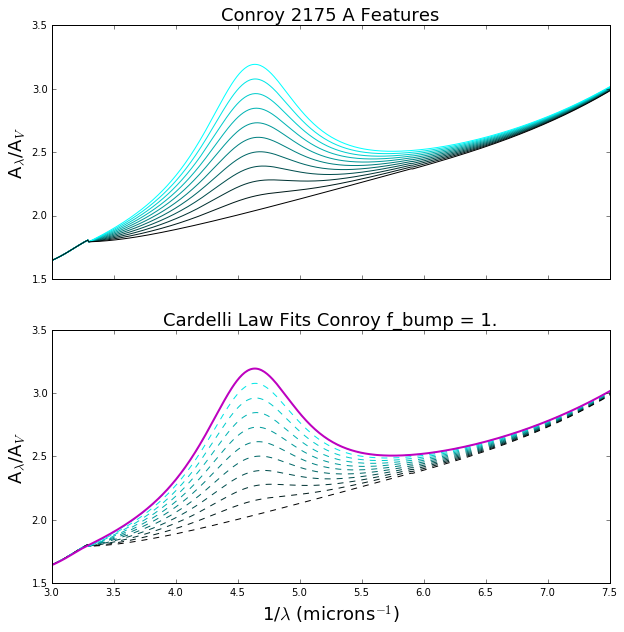

In [27]:
f, ax = plt.subplots(2, sharex=True, figsize = (10,10))

condust0 = attenuation.conroy(waves, f_bump = 0.)
condust1 = attenuation.conroy(waves, f_bump = .1)
condust2 = attenuation.conroy(waves, f_bump = .2)
condust3 = attenuation.conroy(waves, f_bump = .3)
condust4 = attenuation.conroy(waves, f_bump = .4)
condust5 = attenuation.conroy(waves, f_bump = .5)
condust6 = attenuation.conroy(waves, f_bump = .6)
condust7 = attenuation.conroy(waves, f_bump = .7)
condust8 = attenuation.conroy(waves, f_bump = .8)
condust9 = attenuation.conroy(waves, f_bump = .9)
condust10 = attenuation.conroy(waves, f_bump = 1.)

ax[0].plot(1/(waves/1e4), condust1, color=(0,.1,.1))
ax[0].plot(1/(waves/1e4), condust2, color=(0,.2,.2))
ax[0].plot(1/(waves/1e4), condust3, color=(0,.3,.3))
ax[0].plot(1/(waves/1e4), condust4, color=(0,.4,.4))
ax[0].plot(1/(waves/1e4), condust5, color=(0,.5,.5))
ax[0].plot(1/(waves/1e4), condust6, color=(0,.6,.6))
ax[0].plot(1/(waves/1e4), condust7, color=(0,.7,.7))
ax[0].plot(1/(waves/1e4), condust8, color=(0,.8,.8))
ax[0].plot(1/(waves/1e4), condust9, color=(0,.9,.9))
ax[0].plot(1/(waves/1e4), condust10, color=(0,1.,1.))
ax[0].plot(1/(waves/1e4), condust0, color=(0,0,0))
ax[0].set_title('Conroy 2175 A Features', fontsize = 18)
ax[0].set_ylabel('A$_\lambda$/A$_V$ ', fontsize = 18)
ax[0].set_xlim([3.,7.5])
ax[0].set_ylim([1.5,3.5])
ax[1].plot(1/(waves/1e4), condust1, '--', color=(0,.1,.1))
ax[1].plot(1/(waves/1e4), condust2, '--', color=(0,.2,.2))
ax[1].plot(1/(waves/1e4), condust3, '--', color=(0,.3,.3))
ax[1].plot(1/(waves/1e4), condust4, '--', color=(0,.4,.4))
ax[1].plot(1/(waves/1e4), condust5, '--', color=(0,.5,.5))
ax[1].plot(1/(waves/1e4), condust6, '--', color=(0,.6,.6))
ax[1].plot(1/(waves/1e4), condust7, '--', color=(0,.7,.7))
ax[1].plot(1/(waves/1e4), condust8, '--', color=(0,.8,.8))
ax[1].plot(1/(waves/1e4), condust9, '--', color=(0,.9,.9))
ax[1].plot(1/(waves/1e4), condust10, '--', color=(0,1.,1.))
ax[1].plot(1/(waves/1e4), condust0, '--', color=(0,0,0))
ax[1].plot(1/(waves/1e4), cardust, 'm', linewidth = 2)
ax[1].set_title('Cardelli Law Fits Conroy f_bump = 1.', fontsize = 18)
ax[1].set_xlabel('1/$\lambda$ (microns$^{-1}$)', fontsize = 18)
ax[1].set_ylabel('A$_\lambda$/A$_V$ ', fontsize = 18)
ax[1].set_xlim([3.,7.5])
ax[1].set_ylim([1.5,3.5])

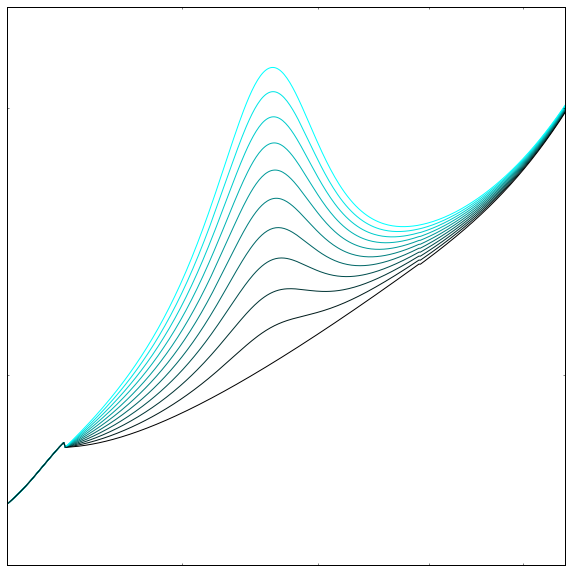

In [28]:
f, ax = plt.subplots(figsize = (10,10))

ax.plot(1/(waves/1e4), condust1, color=(0,.1,.1))
ax.plot(1/(waves/1e4), condust2, color=(0,.2,.2))
ax.plot(1/(waves/1e4), condust3, color=(0,.3,.3))
ax.plot(1/(waves/1e4), condust4, color=(0,.4,.4))
ax.plot(1/(waves/1e4), condust5, color=(0,.5,.5))
ax.plot(1/(waves/1e4), condust6, color=(0,.6,.6))
ax.plot(1/(waves/1e4), condust7, color=(0,.7,.7))
ax.plot(1/(waves/1e4), condust8, color=(0,.8,.8))
ax.plot(1/(waves/1e4), condust9, color=(0,.9,.9))
ax.plot(1/(waves/1e4), condust10, color=(0,1.,1.))
ax.plot(1/(waves/1e4), condust0, color=(0,0,0))
ax.set_xlim([3.,7.5])
ax.set_ylim([1.5,3.5])
ax.set_xscale('log')
ax.set_yscale('log')


['uvot_w1', 'wfc3_uvis_f850lp', 'wfc3_uvis_f475w', 'wfc3_uvis_f555w', 'uvot_m2', 'galex_nuv', 'galex_fuv', 'wfc3_uvis_f225w', 'wfc3_uvis_f775w', 'wfc3_uvis_f275w', 'wfc3_uvis_f438w', 'wfc3_uvis_f814w', 'wfc3_uvis_f606w', 'wfc3_uvis_f390w', 'uvot_w2', 'wfc3_uvis_f218w', 'wfc3_uvis_f336w']


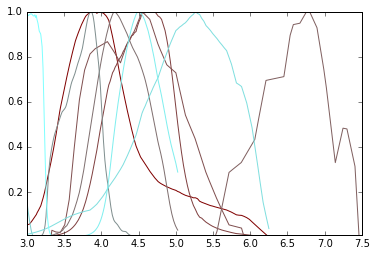

In [29]:
uv = fsps.find_filter('uv')
n = 0
for i in uv:
    n += 1
    m = fsps.get_filter(i)
    transm = m.transmission
    plt.plot(1/(transm[0]/1e4), transm[1]/np.max(transm[1]), color= (.5, (n-1.)/16, (n-1.)/16))
    
plt.xlim([3.,7.5])
plt.ylim([.01,1])
print(uv)

It is hard to see above, but I have deduced from working with all of these that the UVOT filters would be best to use  because, on top of the fact that they surround the bump, they are from a single instrument (on Swift) and that is easiest to coordinate. I also use this instrument a lot, so I might be a bit biased! However, as one might see below, these filters might be too wide to work on the bump. The filters overlap each other, and, though one would be able to detect the bump, the effect might not be as dramatic as it could be.


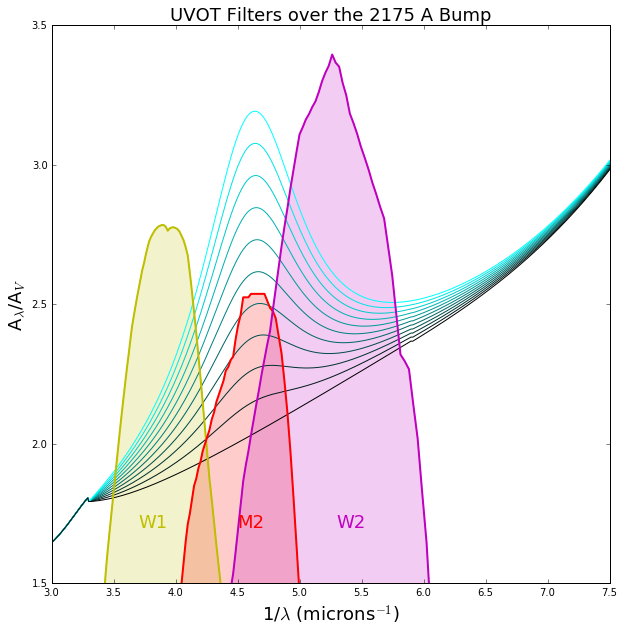

In [34]:
f, ax = plt.subplots(figsize = (10,10))

w1 = fsps.get_filter('uvot_w1')
m2 = fsps.get_filter('uvot_m2')
w2 = fsps.get_filter('uvot_w2')
w1t = w1.transmission
m2t = m2.transmission
w2t = w2.transmission

ax.plot(1/(waves/1e4), condust1, color=(0,.1,.1))
ax.plot(1/(waves/1e4), condust2, color=(0,.2,.2))
ax.plot(1/(waves/1e4), condust3, color=(0,.3,.3))
ax.plot(1/(waves/1e4), condust4, color=(0,.4,.4))
ax.plot(1/(waves/1e4), condust5, color=(0,.5,.5))
ax.plot(1/(waves/1e4), condust6, color=(0,.6,.6))
ax.plot(1/(waves/1e4), condust7, color=(0,.7,.7))
ax.plot(1/(waves/1e4), condust8, color=(0,.8,.8))
ax.plot(1/(waves/1e4), condust9, color=(0,.9,.9))
ax.plot(1/(waves/1e4), condust10, color=(0,1.,1.))
ax.plot(1/(waves/1e4), condust0, color=(0,0,0))
ax.plot(1/(w1t[0]/1e4), w1t[1]/8, 'y', linewidth = 2)
plt.fill_between(1/(w1t[0]/1e4), 1., w1t[1]/8, facecolor='y', alpha = .2)
ax.plot(1/(m2t[0]/1e4), m2t[1]/8, 'r', linewidth = 2)
plt.fill_between(1/(m2t[0]/1e4), 1., m2t[1]/8, facecolor='r', alpha = .2)
ax.plot(1/(w2t[0]/1e4), w2t[1]/8, 'm', linewidth = 2)
plt.fill_between(1/(w2t[0]/1e4), 1., w2t[1]/8, facecolor='m', alpha = .2)
ax.set_xlim([3.,7.5])
ax.set_ylim([1.5,3.5])
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.text(3.7, 1.7, 'W1', color = 'y', fontsize = 18)
ax.text(4.5, 1.7, 'M2', color = 'r', fontsize = 18)
ax.text(5.3, 1.7, 'W2', color = 'm', fontsize = 18)
ax.set_xlabel('1/$\lambda$ (microns$^{-1}$)', fontsize = 18)
ax.set_ylabel('A$_\lambda$/A$_V$ ', fontsize = 18)
ax.set_title('UVOT Filters over the 2175 A Bump', fontsize = 18)

One could also use the GALEX filters to see the peak of the bump and the higher continuum, but the fact that there are only two filters being used makes it much more difficult to check if whether the bump has been found or a strangely shallow UV slope.

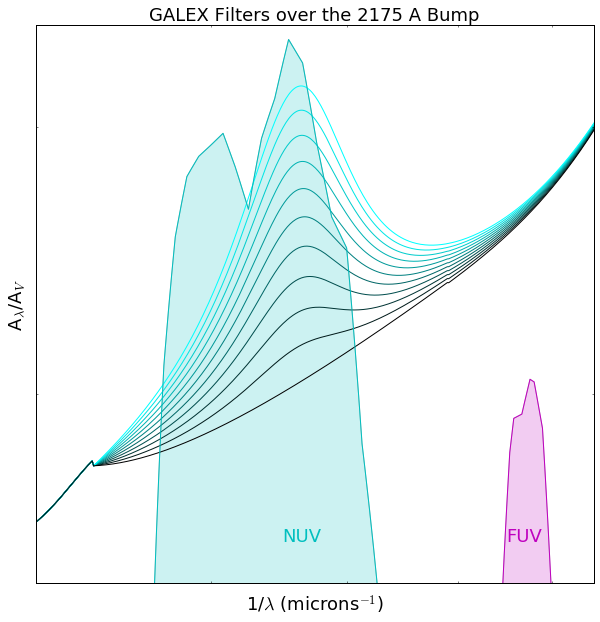

In [47]:
f, ax = plt.subplots(figsize = (10,10))

w1 = fsps.get_filter('galex_nuv')
m2 = fsps.get_filter('galex_fuv')

w1t = w1.transmission
m2t = m2.transmission

ax.plot(1/(waves/1e4), condust1, color=(0,.1,.1))
ax.plot(1/(waves/1e4), condust2, color=(0,.2,.2))
ax.plot(1/(waves/1e4), condust3, color=(0,.3,.3))
ax.plot(1/(waves/1e4), condust4, color=(0,.4,.4))
ax.plot(1/(waves/1e4), condust5, color=(0,.5,.5))
ax.plot(1/(waves/1e4), condust6, color=(0,.6,.6))
ax.plot(1/(waves/1e4), condust7, color=(0,.7,.7))
ax.plot(1/(waves/1e4), condust8, color=(0,.8,.8))
ax.plot(1/(waves/1e4), condust9, color=(0,.9,.9))
ax.plot(1/(waves/1e4), condust10, color=(0,1.,1.))
ax.plot(1/(waves/1e4), condust0, color=(0,0,0))
plt.loglog(1/(nuvtrans[0]/1e4), nuvtrans[1]/18, 'c')
plt.fill_between(1/(nuvtrans[0]/1e4), .01, nuvtrans[1]/18, facecolor='c', alpha = .2)
plt.loglog(1/(fuvtrans[0]/1e4), fuvtrans[1]/18, 'm')
plt.fill_between(1/(fuvtrans[0]/1e4), .01, fuvtrans[1]/18, facecolor='m', alpha = .2)
ax.set_xlim([3.,7.5])
ax.set_ylim([1.5,3.5])
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.text(4.5, 1.6, 'NUV', color = 'c', fontsize = 18)
ax.text(6.5, 1.6, 'FUV', color = 'm', fontsize = 18)
ax.set_xlabel('1/$\lambda$ (microns$^{-1}$)', fontsize = 18)
ax.set_ylabel('A$_\lambda$/A$_V$ ', fontsize = 18)
ax.set_title('GALEX Filters over the 2175 A Bump', fontsize = 18)